# Interaction with IMOS mooring data on the AODN s3 bucket

Tutorial notebook showing how to:

 - Inspect the AODN s3 bucket on cloudstor (list directories and folders)
 - Open individual netcdf files using the Python [xarray](http://xarray.pydata.org/en/stable/) module.
 - Plot time-series data
 - Stack time-series data from different instruments into an array with dimensions: depth x time.
 - Contour plot of the stacked data
 - Some other random analyses...
 
---

Matt Rayson

University of Western Australia

May 2020

In [1]:
# Install modules here (need to restart the notebook after running this cell)
# !pip install --user h5netcdf xarray s3fs 

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from s3fs import S3FileSystem, S3Map


Bad key "backend.qt5" on line 5 in
/home/mrayson/.config/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Access the AODN s3 bucket like this
fs = S3FileSystem(anon=True)
aodn = fs.ls('imos-data')
for item in aodn:
    print(item)


imos-data/Bureau_of_Meteorology
imos-data/CSIRO
imos-data/Deakin_University
imos-data/Defence_Technology_Agency-New_Zealand
imos-data/Department_of_Defence
imos-data/Department_of_Environment_and_Science-Queensland
imos-data/Department_of_Transport-Western_Australia
imos-data/Derwent_Estuary_Program
imos-data/Future_Reef_MAP
imos-data/IMOS
imos-data/Macquarie_University
imos-data/NSW-OEH
imos-data/TERN
imos-data/UNSW
imos-data/UWA
imos-data/WAMSI
imos-data/error.html
imos-data/index.html
imos-data/robots.txt


In [4]:
print('####')
aodn = fs.ls('imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06')
for item in aodn:
    print(item)
    

####
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.K_490.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.chl_gsm.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.chl_oc3.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.chl_oci.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.dt.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.ipar.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.l2_flags.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.nanop_brewin2010at.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.nanop_brewin2012in.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.npp_vgpm_eppley_gsm.nc
imos-data/IMOS/SRS/OC/gridded/aqua/P1D/2020/06/A.P1D.20200601T053000Z.aust.npp_vgpm_eppley_oc3.nc
imos-data/IM

In [5]:
print('####')
aodn = fs.ls('imos-data/IMOS')
for item in aodn:
    print(item)
    
print('####')
aodn = fs.ls('imos-data/IMOS/ANMN')
for item in aodn:
    print(item)
    
print('####')
aodn = fs.ls('imos-data/IMOS/ANMN/QLD')
for item in aodn:
    print(item)

####
imos-data/IMOS/AATAMS
imos-data/IMOS/ABOS
imos-data/IMOS/ACORN
imos-data/IMOS/ACORN_JCU_historical
imos-data/IMOS/ANFOG
imos-data/IMOS/ANMN
imos-data/IMOS/AUV
imos-data/IMOS/Argo
imos-data/IMOS/DWM
imos-data/IMOS/FAIMMS
imos-data/IMOS/OceanCurrent
imos-data/IMOS/SAIMOS
imos-data/IMOS/SOOP
imos-data/IMOS/SRS
imos-data/IMOS/eMII
####
imos-data/IMOS/ANMN/AM
imos-data/IMOS/ANMN/Acoustic
imos-data/IMOS/ANMN/NRS
imos-data/IMOS/ANMN/NSW
imos-data/IMOS/ANMN/PA
imos-data/IMOS/ANMN/QLD
imos-data/IMOS/ANMN/SA
imos-data/IMOS/ANMN/WA
####
imos-data/IMOS/ANMN/QLD/CAM050
imos-data/IMOS/ANMN/QLD/CAM100
imos-data/IMOS/ANMN/QLD/DARBGF
imos-data/IMOS/ANMN/QLD/GBRCCH
imos-data/IMOS/ANMN/QLD/GBRELR
imos-data/IMOS/ANMN/QLD/GBRHIN
imos-data/IMOS/ANMN/QLD/GBRHIS
imos-data/IMOS/ANMN/QLD/GBRLSH
imos-data/IMOS/ANMN/QLD/GBRLSL
imos-data/IMOS/ANMN/QLD/GBRMYR
imos-data/IMOS/ANMN/QLD/GBROTE
imos-data/IMOS/ANMN/QLD/GBRPPS
imos-data/IMOS/ANMN/QLD/ITFFTB
imos-data/IMOS/ANMN/QLD/ITFJBG
imos-data/IMOS/ANMN/QLD/ITFMH

In [13]:
sitename = 'PIL200'
dirnames = ['Temperature','CTD_timeseries']
timestr = '201202'
print('####')
for fpath in dirnames:
    aodn = fs.glob('imos-data/IMOS/ANMN/QLD/{}/{}/*TZ_{}*.nc'.format(sitename, fpath, timestr))
    for item in aodn:
        print(item)

####
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000000Z_PIL200_FV01_PIL200-1202-SBE39-110_END-20120818T041400Z_C-20170620T005904Z.nc
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000000Z_PIL200_FV01_PIL200-1202-SBE39-130_END-20120818T042800Z_C-20170620T005859Z.nc
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000000Z_PIL200_FV01_PIL200-1202-SBE39-140_END-20120818T045000Z_C-20170620T005856Z.nc
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000000Z_PIL200_FV01_PIL200-1202-SBE39-160_END-20120818T042800Z_C-20170620T005851Z.nc
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000000Z_PIL200_FV01_PIL200-1202-SBE39-180_END-20120818T041400Z_C-20170620T005846Z.nc
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000000Z_PIL200_FV01_PIL200-1202-SBE39-30_END-20120819T031600Z_C-20170620T005926Z.nc
imos-data/IMOS/ANMN/QLD/PIL200/Temperature/IMOS_ANMN-QLD_TZ_20120220T000

In [6]:
# Let's look at the Rowley Shoals data
print('####')
aodn = fs.ls('imos-data/IMOS/ANMN/QLD/NWSROW')
for item in aodn:
    print(item)

print('####')
#aodn = fs.ls('imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries')
aodn = fs.glob('imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/*.nc')

for item in aodn:
    print(item)

tempfiles = aodn
    
print('####')
#aodn = fs.ls('imos-data/IMOS/ANMN/QLD/NWSROW/Temperature')
aodn = fs.glob('imos-data/IMOS/ANMN/QLD/NWSROW/Temperature/*.nc') # Use glob to get netcdf file extensions only

for item in aodn:
    print(item)
    tempfiles.append(item)


####
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries
imos-data/IMOS/ANMN/QLD/NWSROW/Temperature
imos-data/IMOS/ANMN/QLD/NWSROW/Velocity
imos-data/IMOS/ANMN/QLD/NWSROW/hourly_timeseries
####
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-147.2_END-20200215T234500Z_C-20200310T070520Z.nc
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-192_END-20200215T234500Z_C-20200310T070443Z.nc
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-21.2_END-20200215T234500Z_C-20200310T070601Z.nc
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-77.2_END-20200215T234500Z_C-20200310T070537Z.nc
####
imos-data/IMOS/ANMN/QLD/NWSROW/Temperature/IMOS_ANMN-QLD_TZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE39-37.2_END-20200215T234500Z_C-

In [43]:
# Open a file with xarray
filename = tempfiles[0]
print(filename)

fileobj = fs.open(filename)
ds = xr.open_dataset(fileobj)
ds

imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-147.2_END-20200215T234500Z_C-20200310T070520Z.nc


<xarray.Dataset>
Dimensions:                   (TIME: 293890)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2019-07-28T00:00:01.000004608 ... 2020-02-17T02:09:01.000005888
    LATITUDE                  float64 ...
    LONGITUDE                 float64 ...
    NOMINAL_DEPTH             float32 ...
Data variables:
    TIMESERIES                int32 ...
    TEMP                      (TIME) float32 ...
    TEMP_quality_control      (TIME) float32 ...
    CNDC                      (TIME) float32 ...
    CNDC_quality_control      (TIME) float32 ...
    PRES_REL                  (TIME) float32 ...
    PRES_REL_quality_control  (TIME) float32 ...
    DEPTH                     (TIME) float32 ...
    DEPTH_quality_control     (TIME) float32 ...
    PSAL                      (TIME) float32 ...
    PSAL_quality_control      (TIME) float32 ...
Attributes:
    abstract:                      The Queensland and Northern Australia moor...
    acknowledgement:               Any users of IMOS data are required to cle...
    author:                        Australian Institute of Marine Science
    author_email:                  adc@aims.gov.au
    cdm_data_type:                 Station
    citation:                      The citation in a list of references is: "...
    comment:                       data looks ok Geospatial vertical min/max ...
    Conventions:                   CF-1.6,IMOS-1.4
    data_centre:                   Australian Ocean Data Network (AODN)
    data_centre_email:             info@aodn.org.au
    date_created:                  2020-03-10T07:05:20Z
    deployment_code:               NWSROW-1907
    disclaimer:                    Data, products and services from IMOS are ...
    featureType:                   timeSeries
    file_version:                  Level 1 - Quality Controlled Data
    file_version_quality_control:  Quality controlled data have been through ...
    geospatial_lat_max:            [-17.75801667]
    geospatial_lat_min:            [-17.75801667]
    geospatial_lon_max:            [119.9061]
    geospatial_lon_min:            [119.9061]
    geospatial_vertical_max:       [153.73802]
    geospatial_vertical_min:       [-0.10636014]
    geospatial_vertical_positive:  down
    history:                       2020-03-10T07:11:01Z - depthPP: Depth comp...
    institution:                   ANMN-QLD
    institution_address:           Australian Institute of Marine Science, 15...
    institution_postal_address:    AIMS, PMB 3, Townsville MC, Townsville 481...
    institution_references:        http://data.aims.gov.au
    instrument:                    SEABIRD SBE37SM + P
    instrument_nominal_depth:      [147.2]
    instrument_nominal_height:     [50.]
    instrument_sample_interval:    [60.]
    instrument_serial_number:      8755
    keywords:                      SBE37SM + P, TIME, TIMESERIES, LATITUDE, L...
    keywords_vocabulary:           IMOS parameter names. See https://github.c...
    license:                       http://creativecommons.org/licenses/by/4.0/
    naming_authority:              IMOS
    platform_code:                 NWSROW
    principal_investigator:        AIMS
    principal_investigator_email:  adc@aims.gov.au
    project:                       Integrated Marine Observing System (IMOS)
    quality_control_log:           imosImpossibleDateQC(dateMin=01/01/2007, d...
    references:                    http://imos.org.au, http://www.aims.gov.au...
    site_code:                     NWSROW
    site_depth_at_deployment:      [197.2]
    source:                        Mooring
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_end:             2020-02-17T02:09:01Z
    time_coverage_start:           2019-07-28T00:00:01Z
    time_deployment_end:           2020-02-15T23:45:00Z
    time_deployment_end_origin:    TimeLastGoodData
    time_deployment_start:         2019-08-04T02:00:00Z
    time_deployment_start_origin:  TimeFirstGo

In [44]:
ds.NOMINAL_DEPTH.values, ds.LATITUDE.values, ds.LONGITUDE.values

(array(147.2, dtype=float32), array(-17.75801667), array(119.9061))

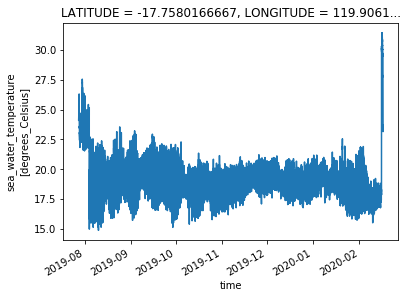

In [45]:
# Plot the water temperature data
plt.figure()
ds['TEMP'].plot()

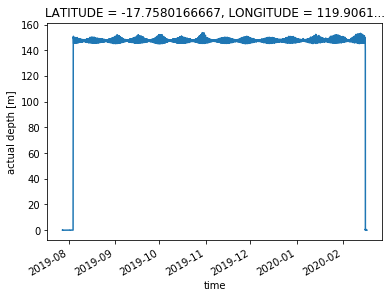

In [46]:
# Plot the pressure data
plt.figure()
ds['DEPTH'].plot()

In [47]:
ds['TEMP_quality_control'].values 

array([4., 4., 4., ..., 4., 4., 4.], dtype=float32)

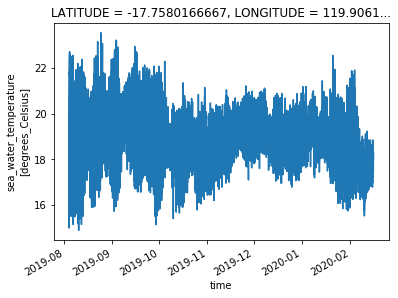

In [48]:
# Plot the quality controlled water temperature data

badidx = ds['TEMP_quality_control'].values != 1
temp = ds['TEMP']
temp[badidx] = np.nan

plt.figure()
temp.plot()

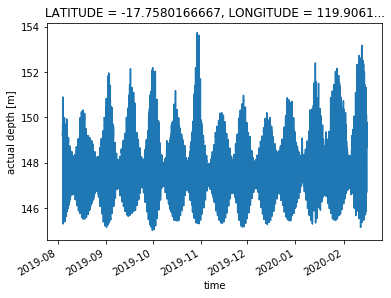

In [50]:
# Plot the quality controlled depth data

badidx = ds['DEPTH_quality_control'].values !=1
temp = ds['DEPTH']
temp[badidx] = np.nan

plt.figure()
temp.plot()


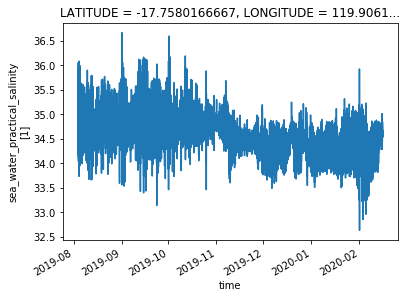

In [51]:
# Plot the QC'd salinity
badidx = ds['PSAL_quality_control'].values !=1
temp = ds['PSAL']
temp[badidx] = np.nan

plt.figure()
temp.plot()

# Combine files along a new depth dimension

http://xarray.pydata.org/en/stable/combining.html

There are two (good) options for dealing with non-overlapping time stamps:

 1. Use `xarray.concat(..., join='outer')` to include the union of the time-stamps (i.e. all time stamps). This results in NaNs for coarsely sampled depth levels.
 2. Use `xarray.DataArray.interp()` to map all depths onto a pre-specified time stamp then use the `concat(..., join='exact')` method to stack them up.
 
We will go with option 2 here as contouring (z-t plots) are easier. 

In [52]:
# Function that combines the steps above to return a QC'd variable as a DataArray object
def get_temp_qc_aodn(filename):
    fileobj = fs.open(filename)
    ds = xr.open_dataset(fileobj)
    badidx = ds['TEMP_quality_control'].values !=1
    temp = ds['TEMP']
    temp[badidx] = np.nan
    return temp

In [53]:
# Create a time series vector to interpolate onto
time = pd.date_range('2019-07-28','2020-02-17', freq='60s').values


In [54]:
alltemp = None
for tempfile in tempfiles:
    print(tempfile)
    
    if alltemp is None:
        temp = get_temp_qc_aodn(tempfile)
        alltemp = temp.interp(TIME=time)
    else:
        temp = get_temp_qc_aodn(tempfile)
        
        # Print out the time information for each file (this is helpful to choose the time vector above...)
        print(temp.TIME.values[0], temp.TIME.values[-1], temp.TIME.shape)
        print(alltemp.TIME.values[0], alltemp.TIME.values[-1], alltemp.TIME.shape)
        dt = temp.TIME[1] - temp.TIME[0]
        print(dt.values.astype('timedelta64[s]'))
        
        # Interpolation step
        temp_i = temp.interp(TIME=time)
        
        # Check for too many missing values...
        if np.all(np.isnan(temp_i)):
            print('Skipping file... all bad data!!')
            continue
        
        # Stack the vector onto the main array
        alltemp = xr.concat([alltemp,temp_i], dim='NOMINAL_DEPTH', join='exact')
        #alltemp.combine_first(temp)

imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-147.2_END-20200215T234500Z_C-20200310T070520Z.nc
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-192_END-20200215T234500Z_C-20200310T070443Z.nc
2019-08-01T00:00:01.000004608 2020-02-17T01:22:01.000003072 (288083,)
2019-07-28T00:00:00.000000000 2020-02-17T00:00:00.000000000 (293761,)
59 seconds
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-21.2_END-20200215T234500Z_C-20200310T070601Z.nc
2019-08-01T00:00:01.000004608 2020-02-17T00:33:01.000007424 (288034,)
2019-07-28T00:00:00.000000000 2020-02-17T00:00:00.000000000 (293761,)
59 seconds
imos-data/IMOS/ANMN/QLD/NWSROW/CTD_timeseries/IMOS_ANMN-QLD_CSTZ_20190804T020000Z_NWSROW_FV01_NWSROW-1907-SBE37SM-RS232-77.2_END-20200215T234500Z_C-20200310T070537Z.nc
2019-08-01T00:00:01.000004

In [55]:
# The depth dimensions are out of order so let's sort them...
alltemp_sort = alltemp.sortby(['NOMINAL_DEPTH'])
alltemp_sort

<xarray.DataArray 'TEMP' (NOMINAL_DEPTH: 15, TIME: 293761)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    LONGITUDE      float64 119.9
    LATITUDE       float64 -17.76
  * TIME           (TIME) datetime64[ns] 2019-07-28 ... 2020-02-17
  * NOMINAL_DEPTH  (NOMINAL_DEPTH) float64 13.2 21.2 27.2 ... 177.2 192.0 194.2
Attributes:
    ancillary_variables:  TEMP_quality_control
    long_name:            sea_water_temperature
    standard_name:        sea_water_temperature
    units:                degrees_Celsius
    valid_max:            [40.]
    valid_min:            [-2.5]

CPU times: user 367 ms, sys: 42.9 ms, total: 410 ms
Wall time: 409 ms


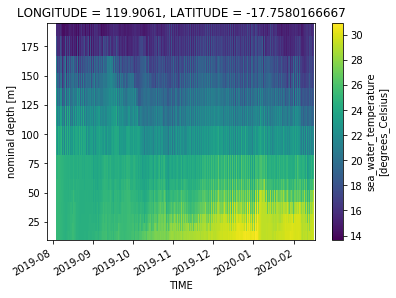

In [56]:
%%time
#plt.figure()
alltemp_sort.plot()


CPU times: user 117 ms, sys: 4.14 ms, total: 121 ms
Wall time: 119 ms


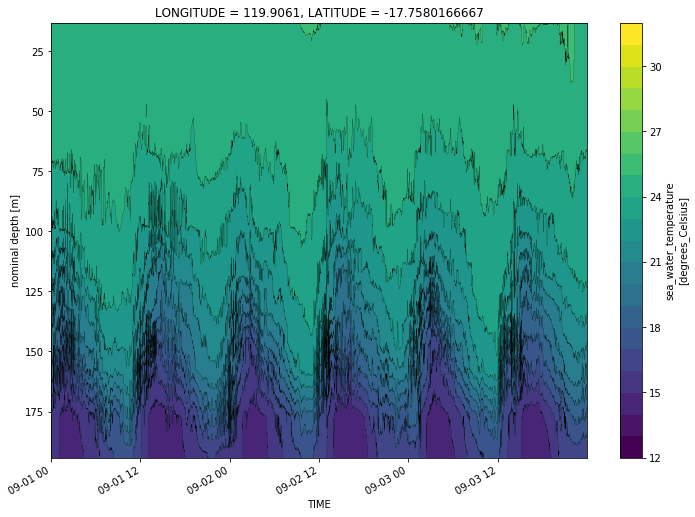

In [57]:
%%time
plt.figure(figsize=(12,8))
alltemp_sort.sel(TIME=slice('2019-09-01','2019-09-03')).plot.contourf(levels=np.arange(12,33,1))
alltemp_sort.sel(TIME=slice('2019-09-01','2019-09-03')).plot.contour(levels=np.arange(12,33,1),\
                            colors='k', linewidths=0.2)
plt.gca().invert_yaxis()

CPU times: user 71.7 ms, sys: 2.9 ms, total: 74.6 ms
Wall time: 73.3 ms


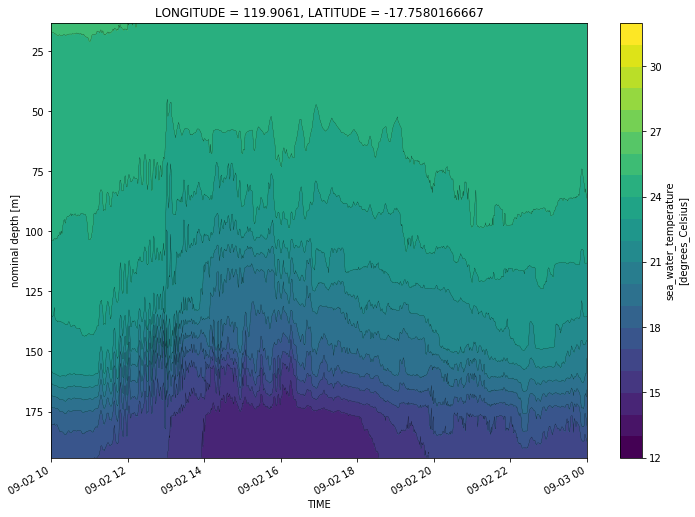

In [58]:
%%time
plt.figure(figsize=(12,8))
alltemp_sort.sel(TIME=slice('2019-09-02 10:00:00','2019-09-03 00:00:00')).plot.contourf(levels=np.arange(12,33,1))
alltemp_sort.sel(TIME=slice('2019-09-02 10:00:00','2019-09-03 00:00:00')).plot.contour(levels=np.arange(12,33,1),\
                            colors='k', linewidths=0.2)
plt.gca().invert_yaxis()

CPU times: user 125 ms, sys: 4.12 ms, total: 129 ms
Wall time: 128 ms


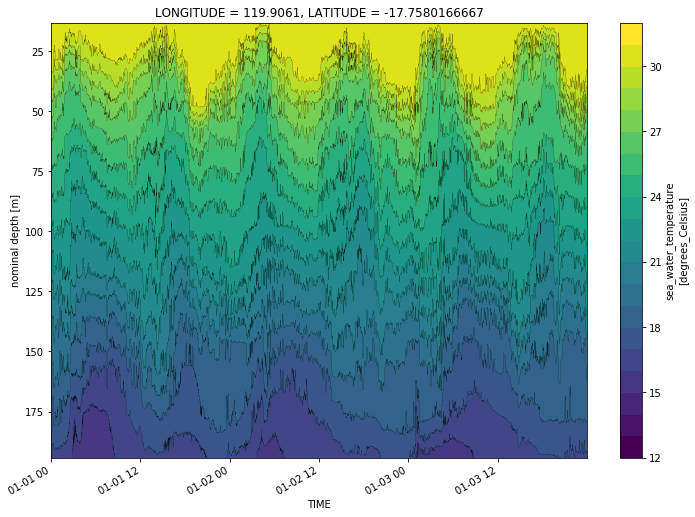

In [38]:
%%time
plt.figure(figsize=(12,8))
alltemp_sort.sel(TIME=slice('2020-01-01','2020-01-03')).plot.contourf(levels=np.arange(12,33,1))
alltemp_sort.sel(TIME=slice('2020-01-01','2020-01-03')).plot.contour(levels=np.arange(12,33,1),\
                            colors='k', linewidths=0.2)
plt.gca().invert_yaxis()

In [39]:
# Let's do some stats on the data...
monthly_means = alltemp_sort.groupby('TIME.month').mean()
monthly_means

/scratch/.local/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'TEMP' (NOMINAL_DEPTH: 15, month: 8)>
array([[29.73175788, 29.53138335,         nan, 24.84761061, 25.41730168,
        26.94255335, 28.66599797, 29.95492806],
       [29.56663788, 29.46554895,         nan, 24.81681799, 25.2761137 ,
        26.44842778, 28.04021615, 29.62925622],
       [29.34522847, 29.30632989,         nan, 24.80070615, 25.18007471,
        26.07291459, 27.36270154, 29.10926141],
       [28.67268195, 28.58903312,         nan, 24.76384003, 25.02313493,
        25.47675496, 26.30602768, 27.8594223 ],
       [27.46304141, 27.20978009,         nan, 24.72534315, 24.86378956,
        24.96046144, 25.52861787, 26.70181874],
       [26.11017352, 25.84254337,         nan, 24.66578208, 24.66730178,
        24.51264424, 24.8821004 , 25.78504236],
       [25.07958631, 24.81004698,         nan, 24.56544295, 24.43448253,
        24.06129372, 24.32309167, 24.99338068],
       [22.95983036, 22.43583202,         nan, 23.60962268, 23.44230594,
        22.38074462, 22.54273905, 22.84604341],
       [21.44100999, 20.5318512 ,         nan, 22.10560089, 22.34187587,
        20.96299092, 21.13907795, 21.34056722],
       [20.06651933, 19.09943849,         nan, 20.75572131, 21.28974197,
        19.81236836, 20.0627729 , 20.1713043 ],
       [18.84532743, 17.72940818,         nan, 19.32763427, 20.01922496,
        18.57307187, 18.92247958, 18.95926972],
       [18.1478403 , 17.10222747,         nan, 18.39793781, 18.94258617,
        17.84204698, 18.17630303, 18.24365164],
       [16.55015392, 16.20774197,         nan, 16.22068683, 16.29931998,
        16.3184387 , 16.58917838, 16.90107454],
       [15.75703717, 15.68132323,         nan, 15.05378271, 15.21698777,
        15.5961875 , 16.05015251, 16.17484843],
       [15.68395242, 15.65752041,         nan, 15.01277082, 15.16478819,
        15.55959158, 16.02839892, 16.14389607]])
Coordinates:
    LONGITUDE      float64 119.9
    LATITUDE       float64 -17.76
  * NOMINAL_DEPTH  (NOMINAL_DEPTH) float64 13.2 21.2 27.2 ... 177.2 192.0 194.2
  * month          (month) int64 1 2 7 8 9 10 11 12

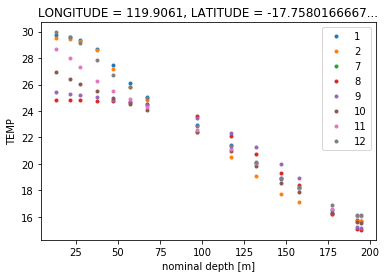

In [40]:
# ...and plot them
plt.figure()
for ii in range(0,8):
    monthly_means[:,ii].plot(ls='', marker='.')
plt.legend(monthly_means.month.values)

[ 0.14323215 -0.08981474 -0.32772204  0.19864862 -0.87058729 -0.08908177]


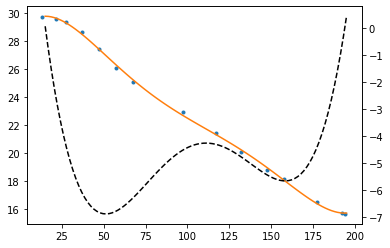

In [41]:
# Getting really side-tracked here... now let's do a polynomial fit
X = monthly_means.NOMINAL_DEPTH.values
Y = monthly_means[:,0].values

xout = np.linspace(15,195,100)

idx = ~np.isnan(Y)

xin, yin = X[idx],Y[idx]
xmu, ymu = np.mean(xin), np.mean(yin)
xstd, ystd = np.std(xin), np.std(yin)

p = np.polyfit((xin-xmu)/xstd, (yin-ymu)/ystd,5)
yout = np.polyval(p, (xout-xmu)/xstd)

plt.figure()
plt.plot(X,Y,'.')
plt.plot(xout,yout*ystd + ymu)
plt.twinx()
# Plot the derivatives just for fun...
p_z = np.polyder(p,1)
y_z = np.polyval(p_z*ystd, (xout-xmu)/xstd)
plt.plot(xout,y_z ,'k--')


print(p)